In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt


In [5]:
x_train = pd.read_csv("XTrain.csv")
y_train = pd.read_csv("yTrain.csv", names=['lifeCycle'])

x_val = pd.read_csv("XVal.csv")
y_val = pd.read_csv("yVal.csv", names=['lifeCycle'])

x_test = pd.read_csv("XTest.csv")
y_test = pd.read_csv("yTest.csv", names=['lifeCycle'])
x_train.head()


,DeltaQ_var,DeltaQ_min,CapFadeCycle2Slope,CapFadeCycle2Intercept,Qd2,AvgChargeTime,MinIR,IRDiff2And100
0,-5.083856,-1.963844,0.000006,1.080877,1.075301,13.409150,0.016764,-0.000034
1,-4.375406,-1.692824,0.000016,1.084122,1.079723,12.025140,0.016098,0.000044
2,-4.146406,-1.588937,0.000008,1.079956,1.076127,10.967850,0.015923,-0.000124
3,-3.806771,-1.421631,-0.000008,1.097375,1.093864,10.025082,0.016083,-0.000037
4,-4.118073,-1.608857,0.000023,1.058884,1.053779,11.668876,0.015963,-0.000304


In [6]:
y_train.head()

,lifeCycle
0,2160
1,1434
2,1074
3,870
4,788


In [7]:
df_train = pd.concat([x_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
df_val = pd.concat([x_val.reset_index(drop=True), y_val.reset_index(drop=True)], axis=1)
df_test = pd.concat([x_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

df_train.head()

,DeltaQ_var,DeltaQ_min,CapFadeCycle2Slope,CapFadeCycle2Intercept,Qd2,AvgChargeTime,MinIR,IRDiff2And100,lifeCycle
0,-5.083856,-1.963844,0.000006,1.080877,1.075301,13.409150,0.016764,-0.000034,2160
1,-4.375406,-1.692824,0.000016,1.084122,1.079723,12.025140,0.016098,0.000044,1434
2,-4.146406,-1.588937,0.000008,1.079956,1.076127,10.967850,0.015923,-0.000124,1074
3,-3.806771,-1.421631,-0.000008,1.097375,1.093864,10.025082,0.016083,-0.000037,870
4,-4.118073,-1.608857,0.000023,1.058884,1.053779,11.668876,0.015963,-0.000304,788


In [8]:
df = pd.concat([df_train,df_val,df_test],axis=0).reset_index(drop=True)
df.head()

,DeltaQ_var,DeltaQ_min,CapFadeCycle2Slope,CapFadeCycle2Intercept,Qd2,AvgChargeTime,MinIR,IRDiff2And100,lifeCycle
0,-5.083856,-1.963844,0.000006,1.080877,1.075301,13.409150,0.016764,-0.000034,2160
1,-4.375406,-1.692824,0.000016,1.084122,1.079723,12.025140,0.016098,0.000044,1434
2,-4.146406,-1.588937,0.000008,1.079956,1.076127,10.967850,0.015923,-0.000124,1074
3,-3.806771,-1.421631,-0.000008,1.097375,1.093864,10.025082,0.016083,-0.000037,870
4,-4.118073,-1.608857,0.000023,1.058884,1.053779,11.668876,0.015963,-0.000304,788


In [9]:
df['lifeCycle']

0      2160
1      1434
2      1074
3       870
4       788
       ... 
119    1156
120     796
121     786
122     940
123    1801
Name: lifeCycle, Length: 124, dtype: int64

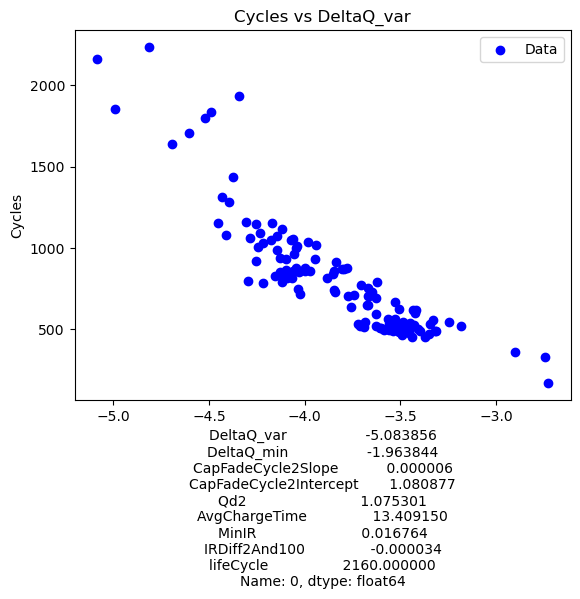

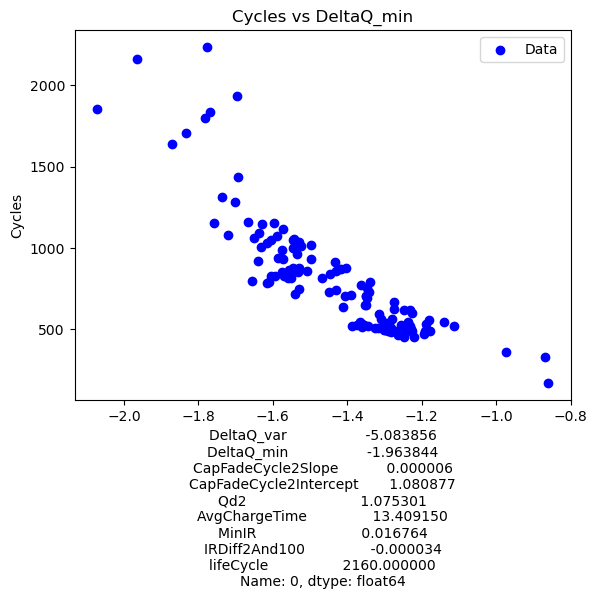

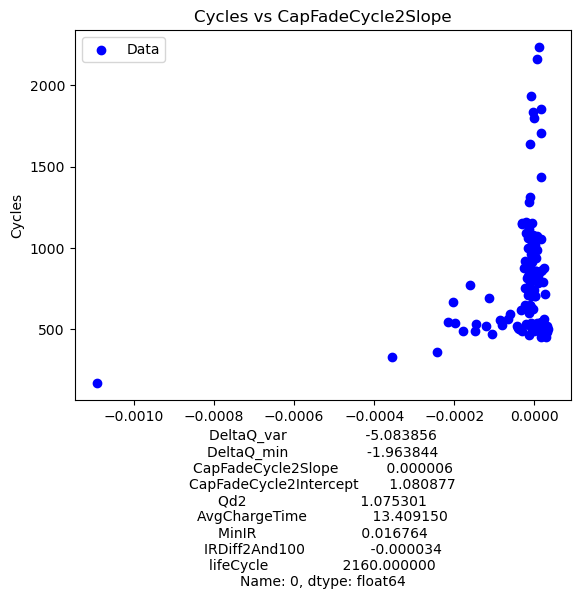

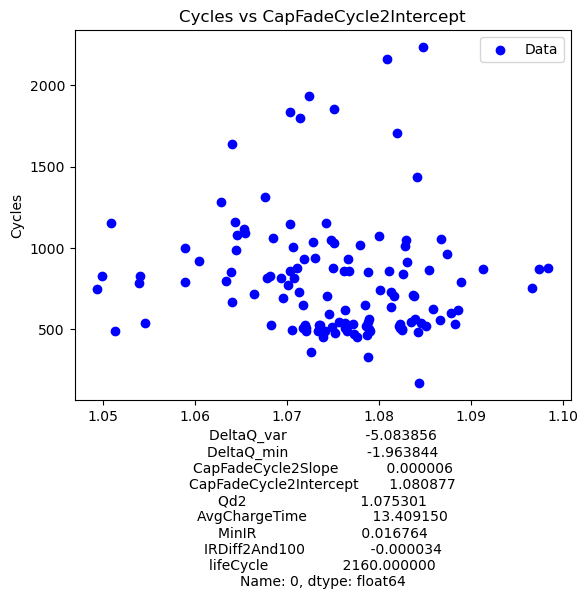

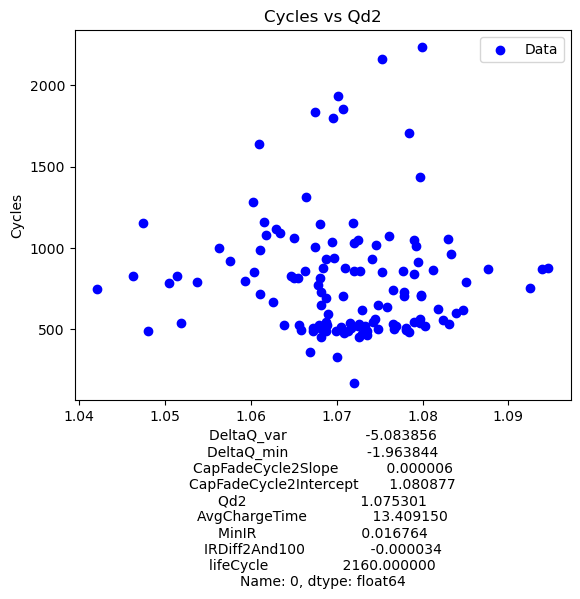

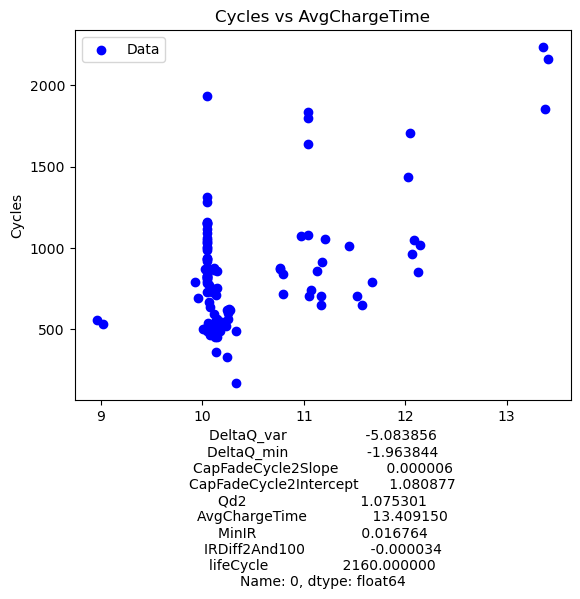

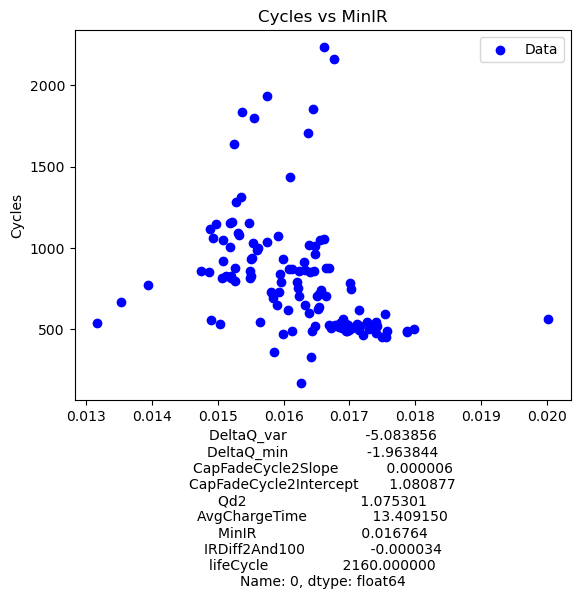

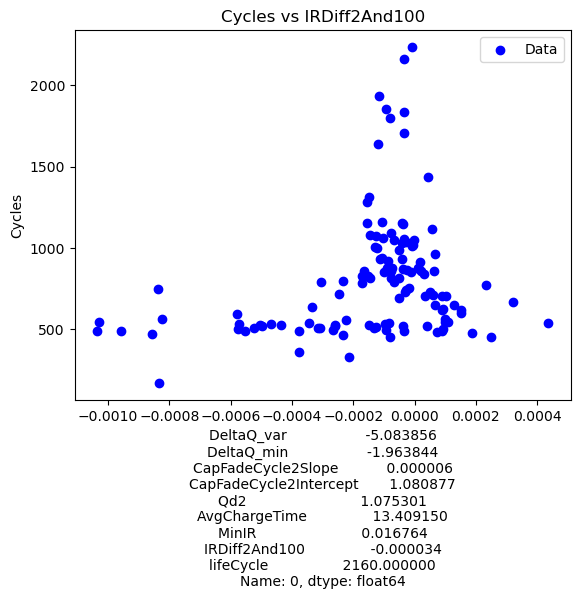

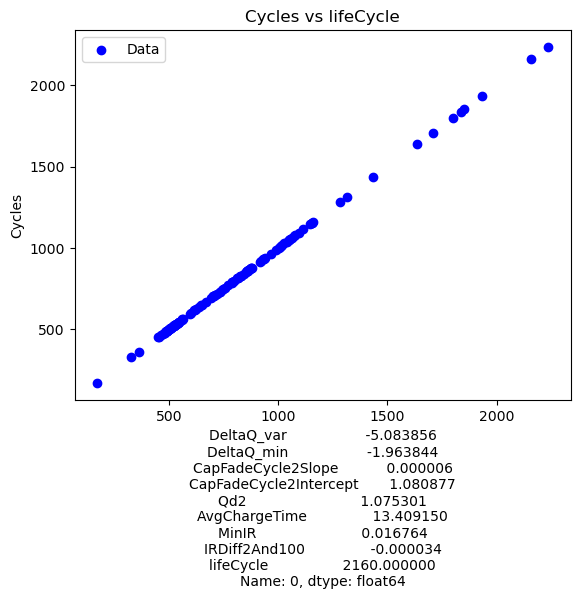

In [10]:
for cols in df.columns:
    plt.scatter(df[cols],df['lifeCycle'], label="Data", color="blue")
    x = tf.linspace(-20, 40, 100)
    #plt.plot(x_train['DeltaQ_var'], y_train, label="Fit", color="red", linewidth=3)
    plt.legend()
    plt.title(f"Cycles vs {cols}")
    plt.ylabel("Cycles")
    plt.xlabel(df.iloc[0])
    plt.show()

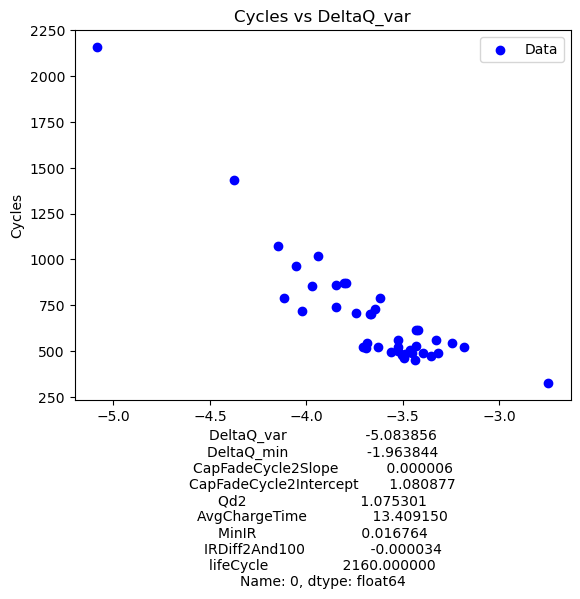

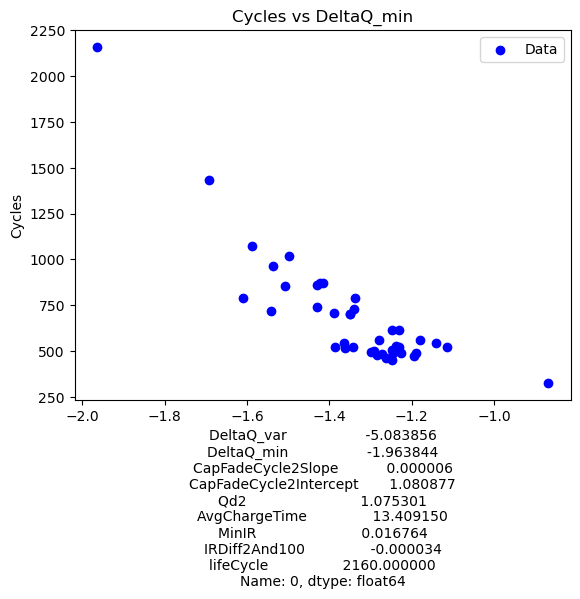

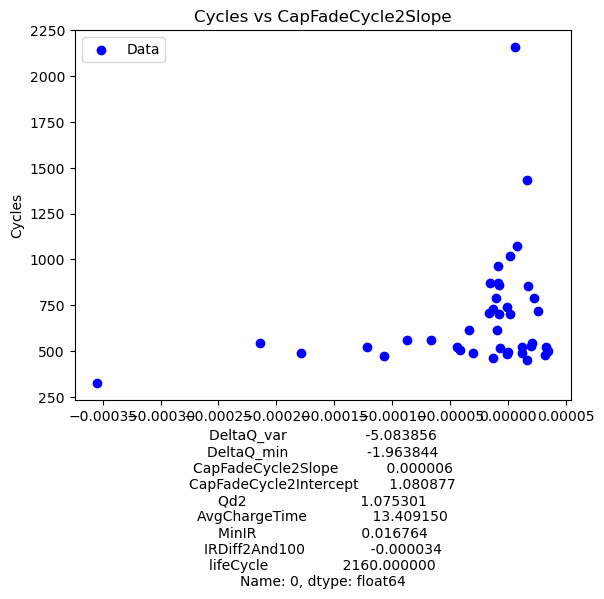

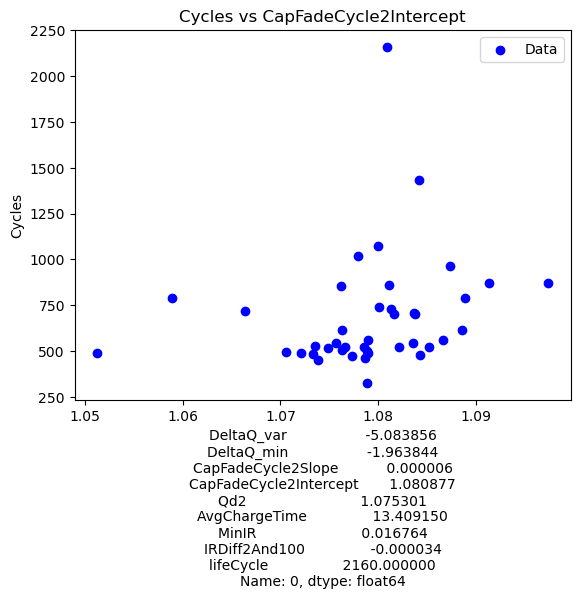

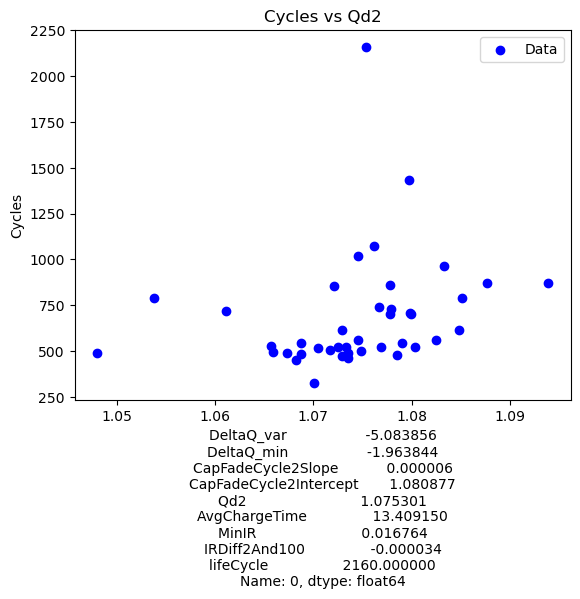

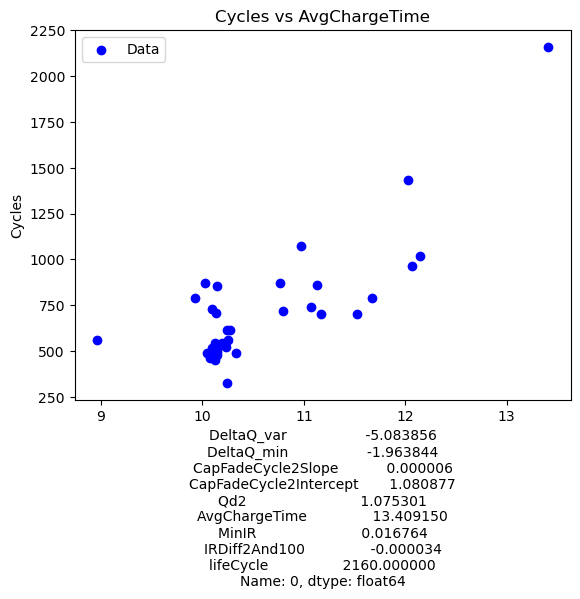

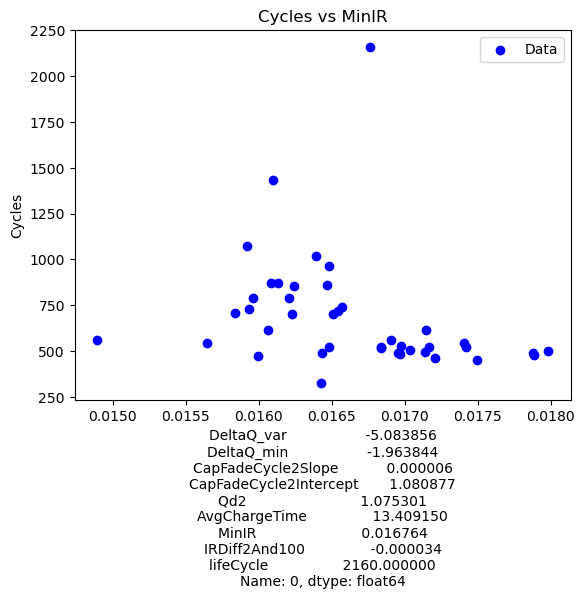

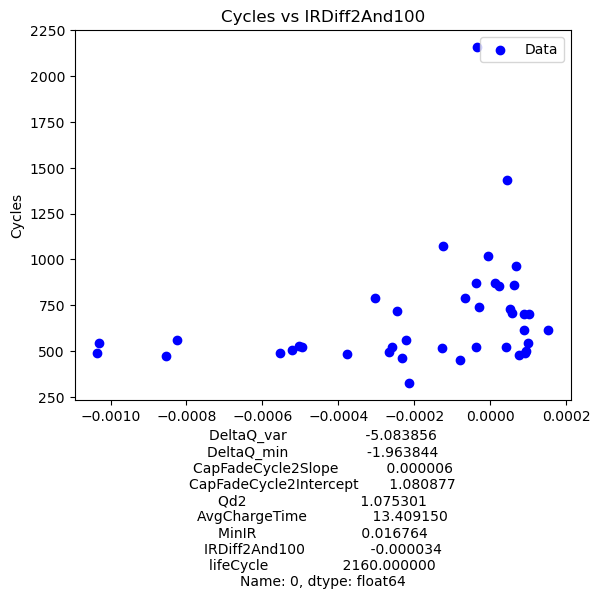

KeyError: 'lifeCycle'

In [11]:

for cols in df_train.columns:
    plt.scatter(x_train[cols], y_train, label="Data", color="blue")
    x = tf.linspace(-20, 40, 100)
    #plt.plot(x_train['DeltaQ_var'], y_train, label="Fit", color="red", linewidth=3)
    plt.legend()
    plt.title(f"Cycles vs {cols}")
    plt.ylabel("Cycles")
    plt.xlabel(df_train.iloc[0])
    plt.show()

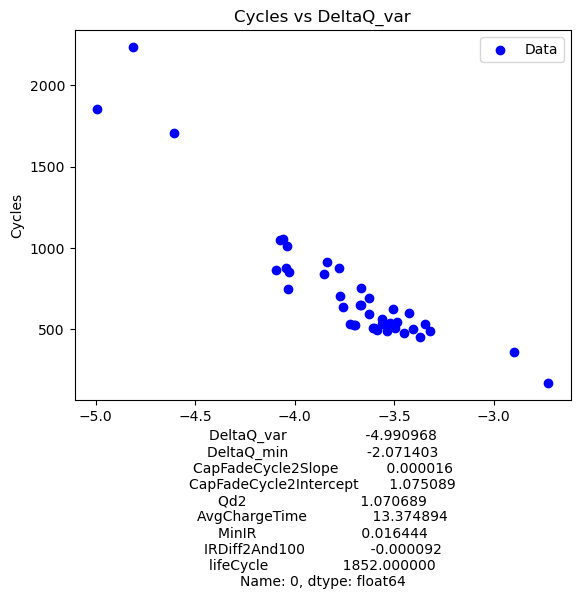

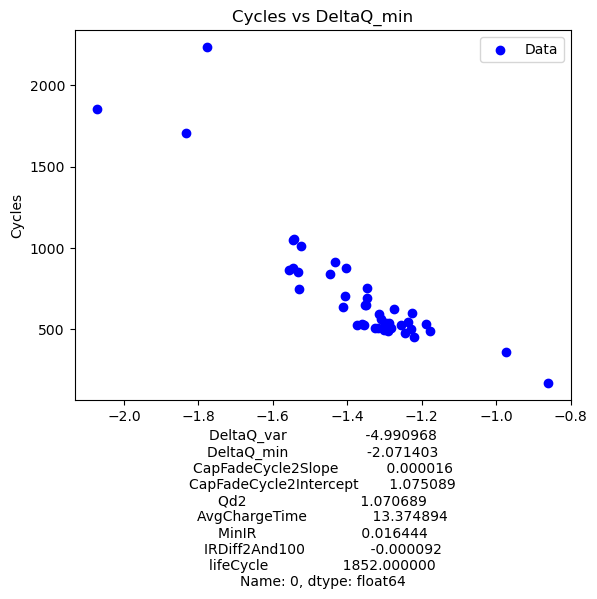

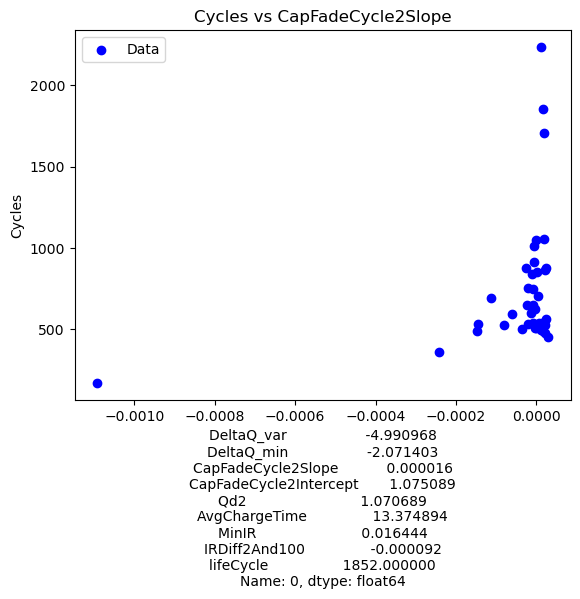

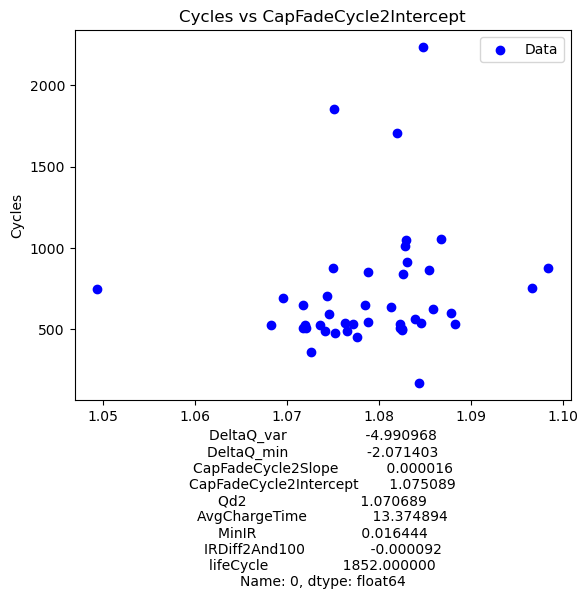

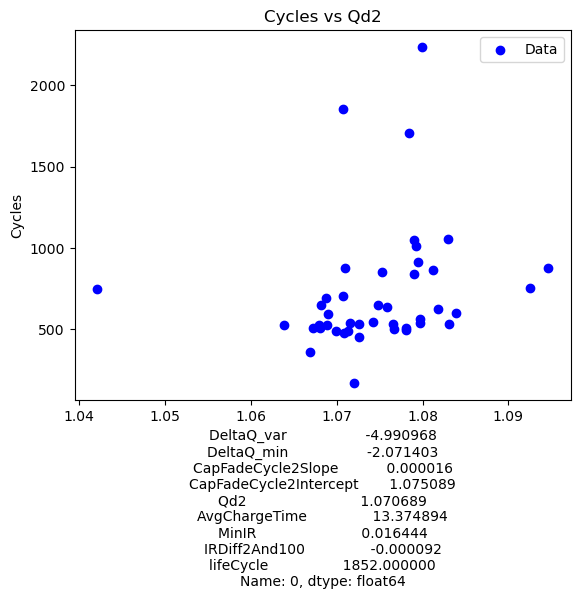

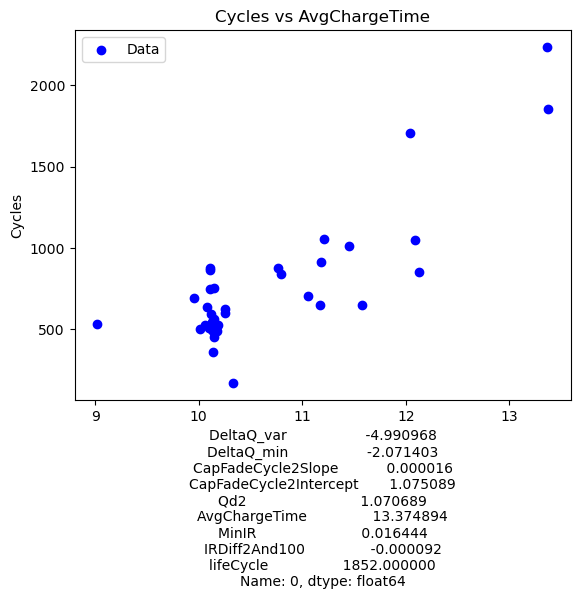

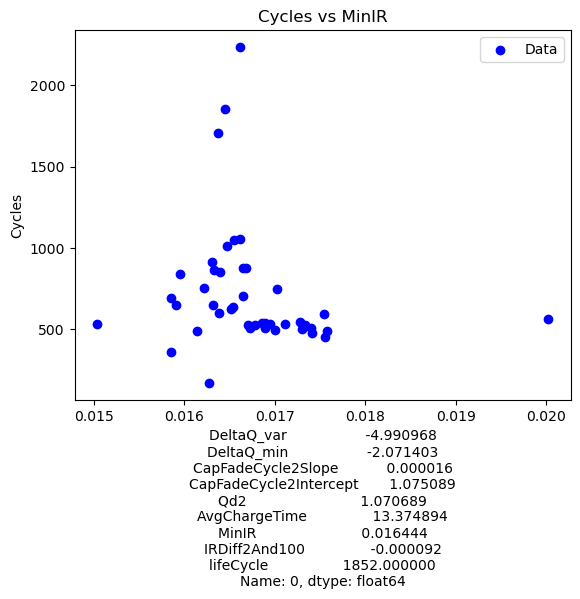

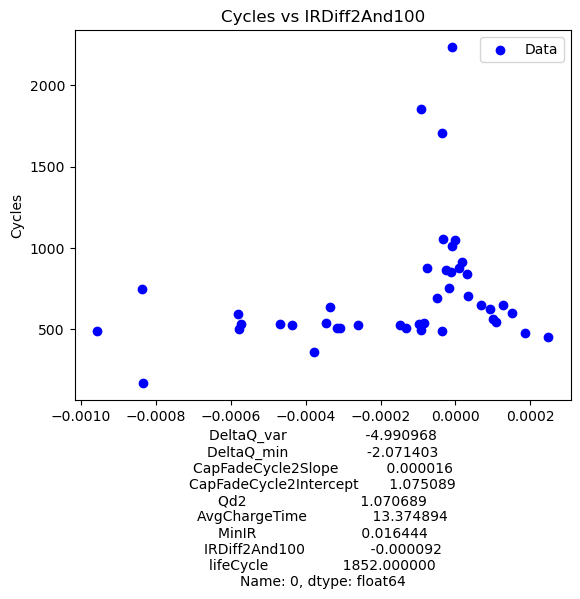

KeyError: 'lifeCycle'

In [ ]:

for cols in df_val.columns:
    plt.scatter(x_val[cols], y_val, label="Data", color="blue")
    x = tf.linspace(-20, 40, 100)
    #plt.plot(x_train['DeltaQ_var'], y_train, label="Fit", color="red", linewidth=3)
    plt.legend()
    plt.title(f"Cycles vs {cols}")
    plt.ylabel("Cycles")
    plt.xlabel(df_val.iloc[0])
    plt.show()

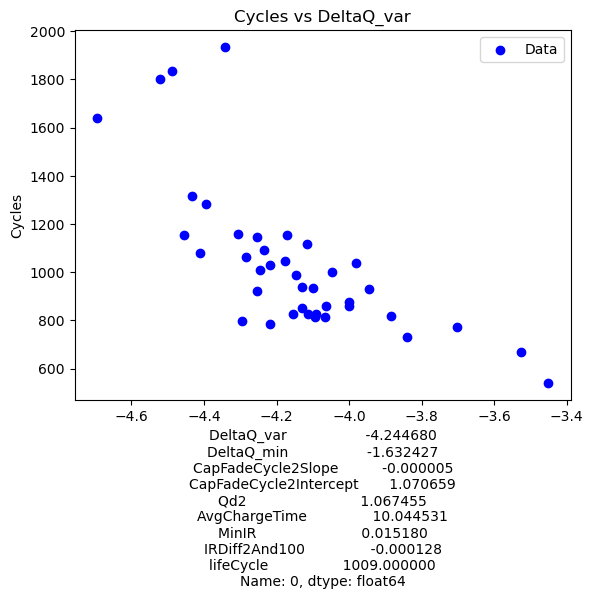

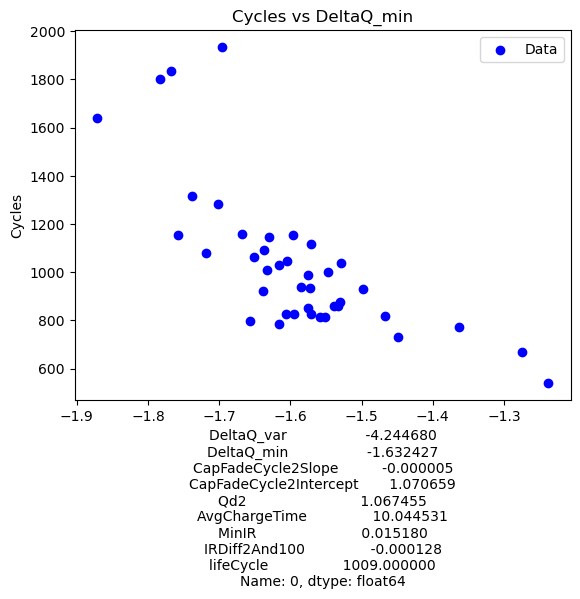

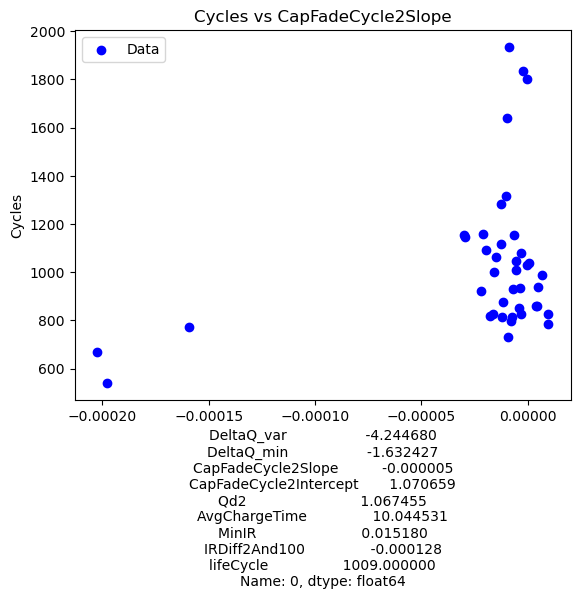

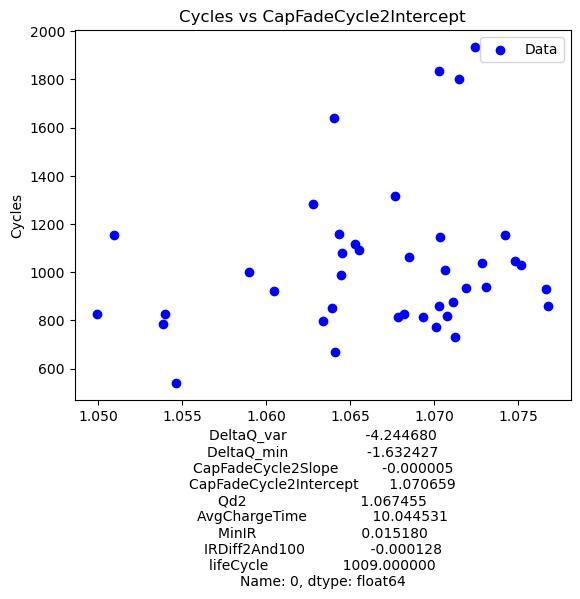

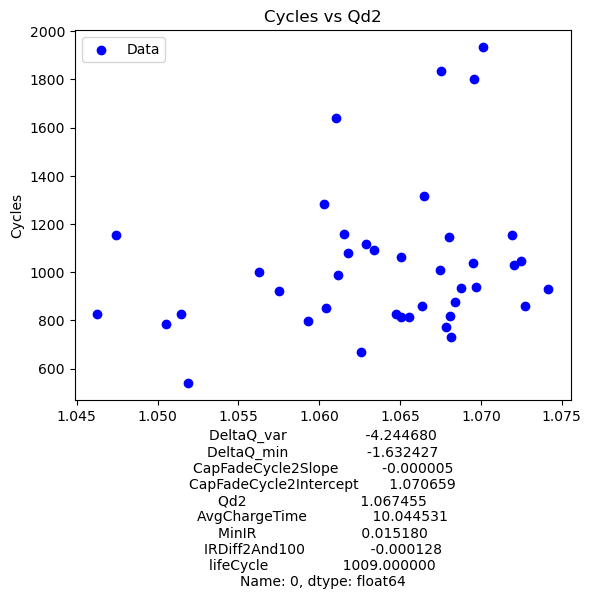

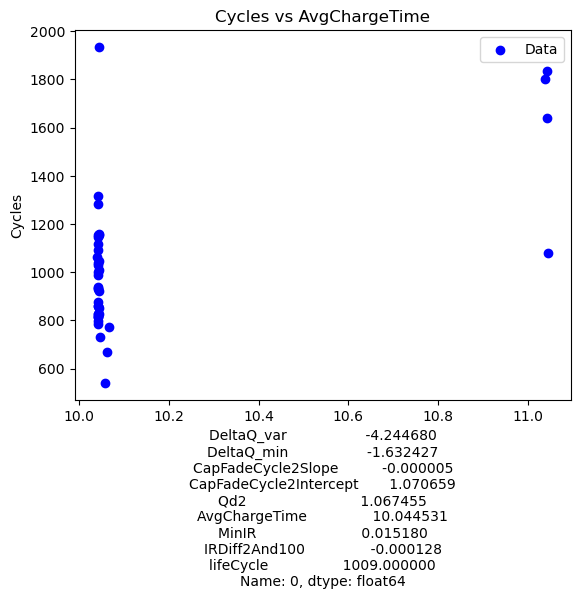

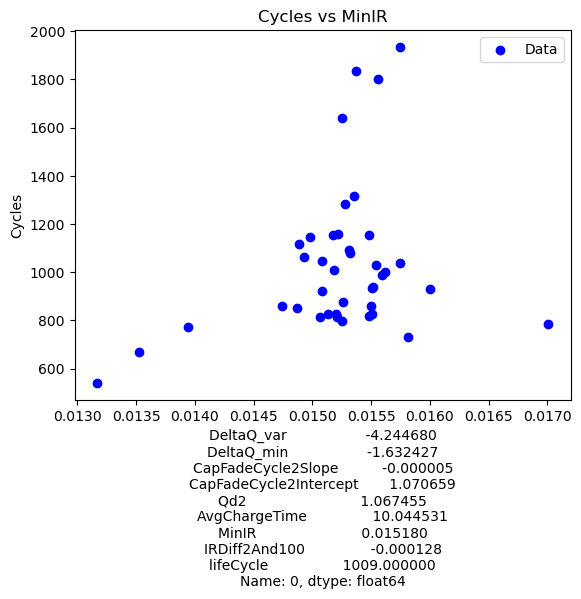

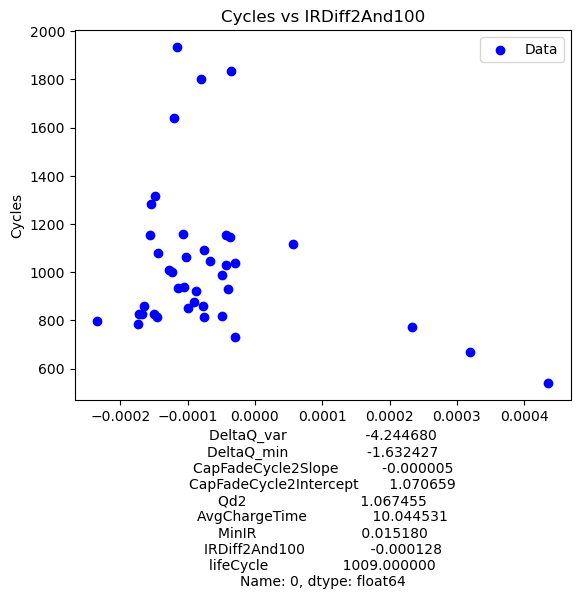

KeyError: 'lifeCycle'

In [ ]:

for cols in df_test.columns:
    plt.scatter(x_test[cols], y_test, label="Data", color="blue")
    x = tf.linspace(-20, 40, 100)
    #plt.plot(x_train['DeltaQ_var'], y_train, label="Fit", color="red", linewidth=3)
    plt.legend()
    plt.title(f"Cycles vs {cols}")
    plt.ylabel("Cycles")
    plt.xlabel(df_test.iloc[0])
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


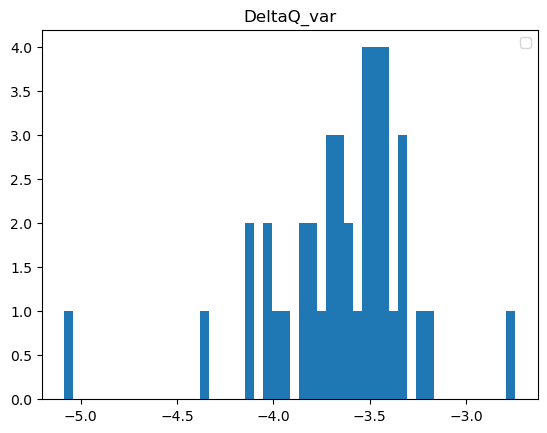

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


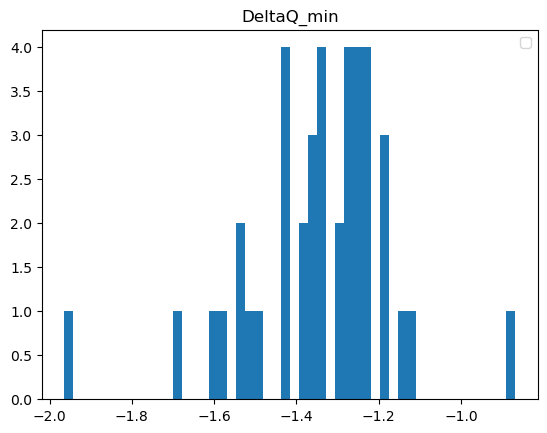

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


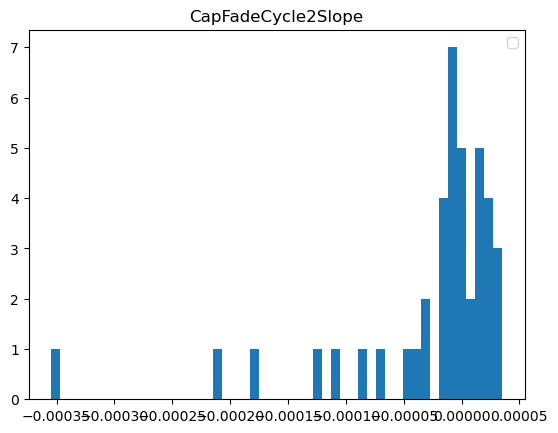

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


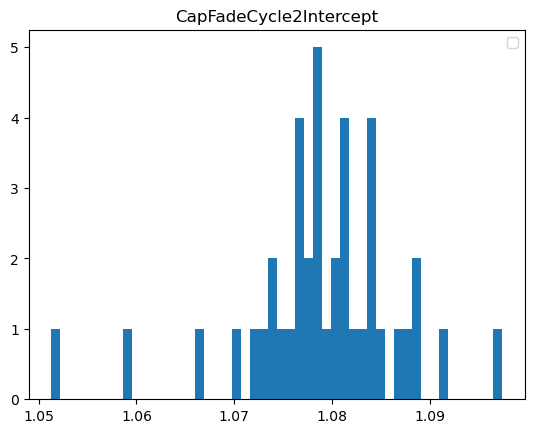

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


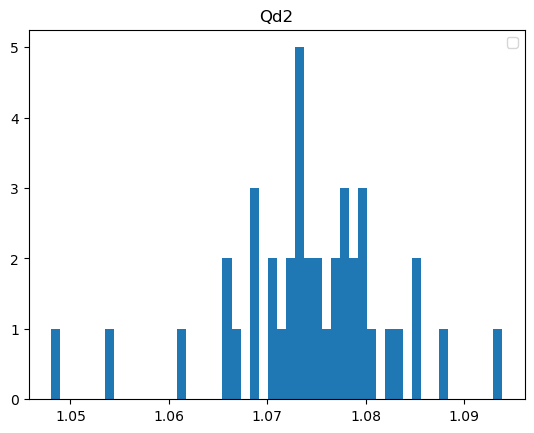

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


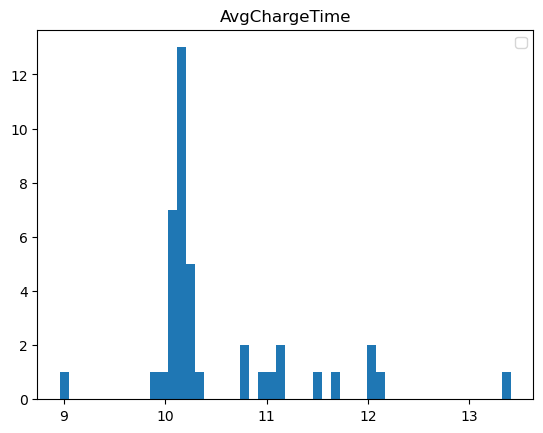

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


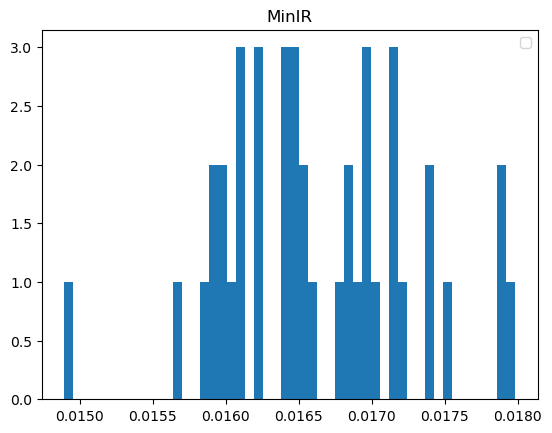

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


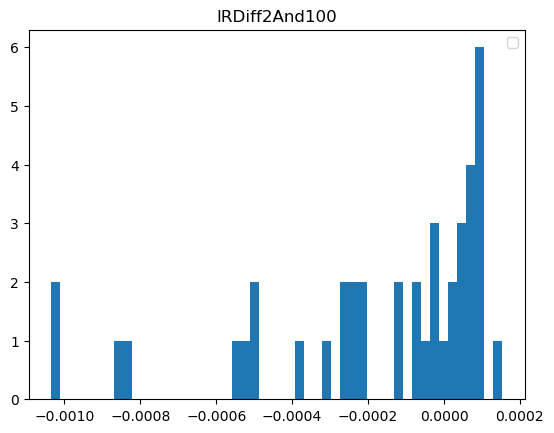

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


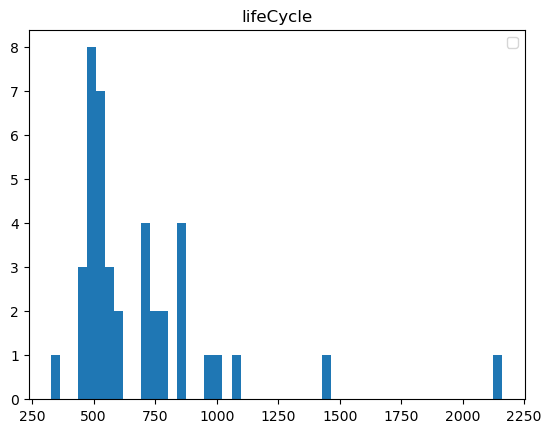

In [ ]:
for cols in df_train.columns:
    plt.hist(df_train[cols],bins=50)
    plt.legend()
    plt.title(f"{cols}")
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


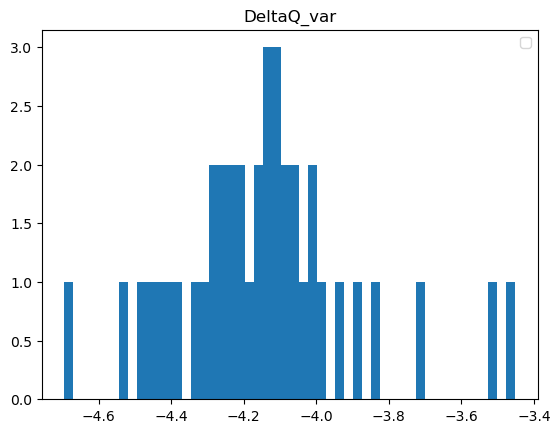

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


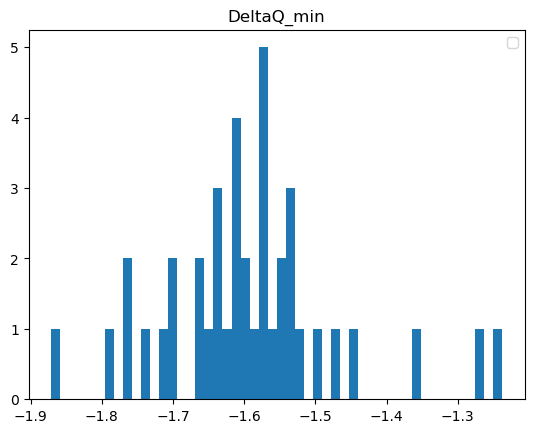

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


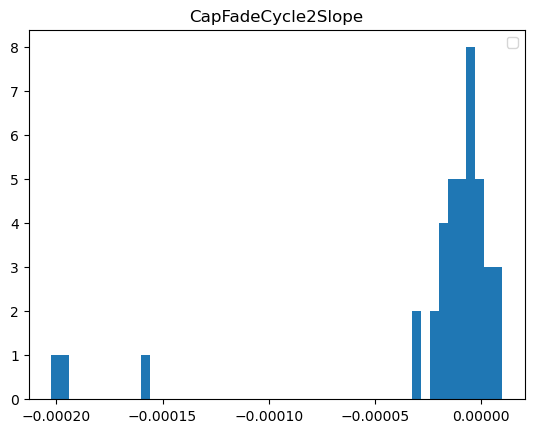

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


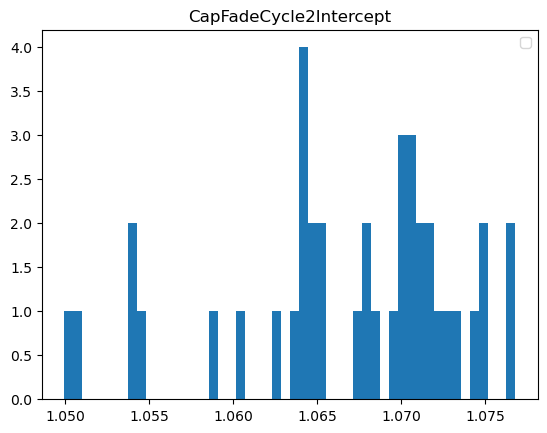

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


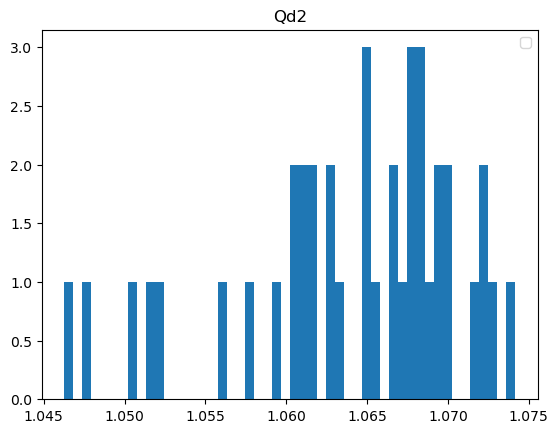

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


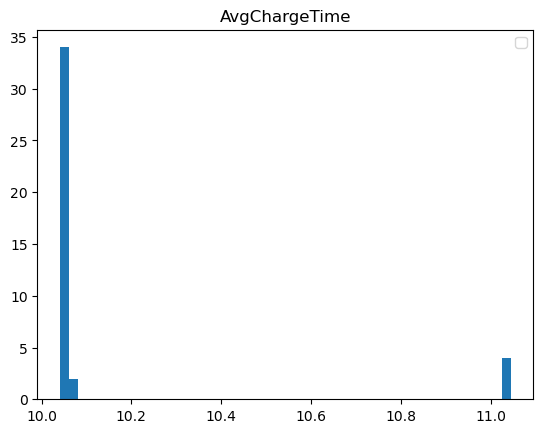

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


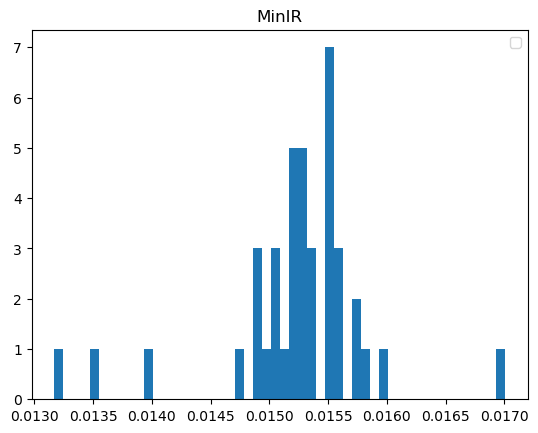

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


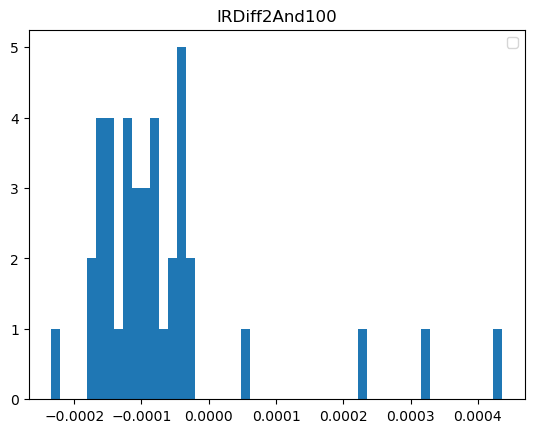

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


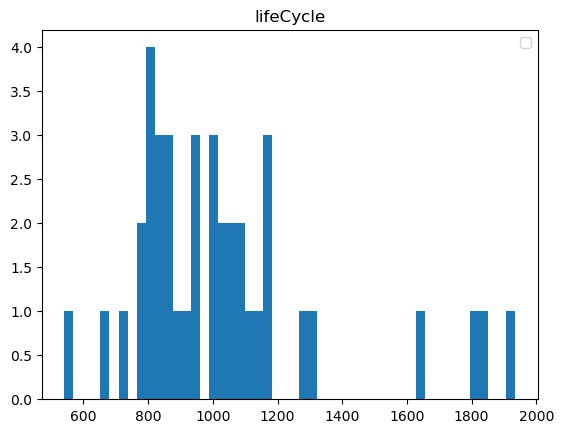

In [ ]:
for cols in df_test.columns:
    plt.hist(df_test[cols],bins=50)
    plt.legend()
    plt.title(f"{cols}")
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


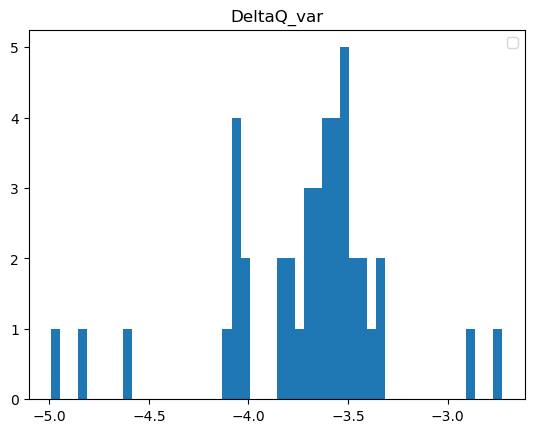

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


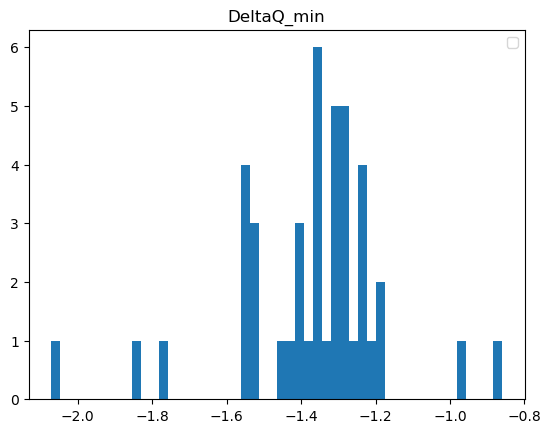

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


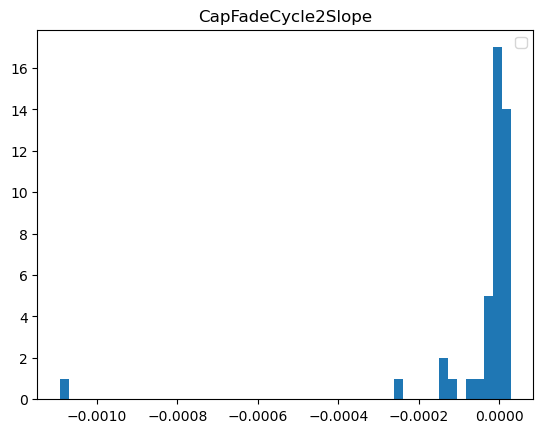

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


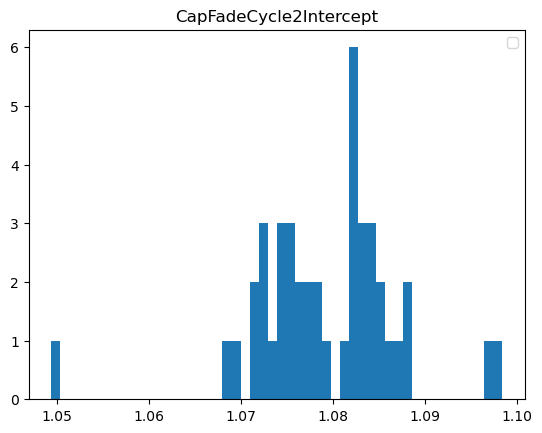

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


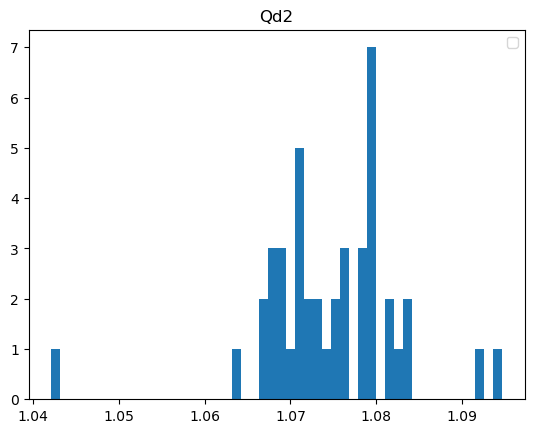

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


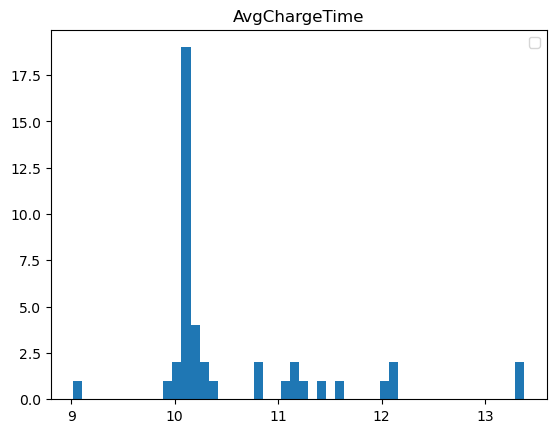

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


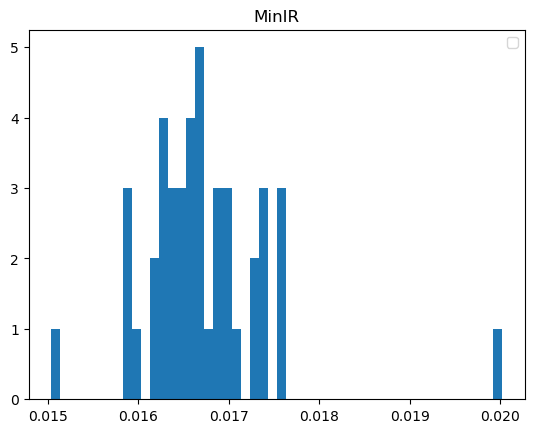

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


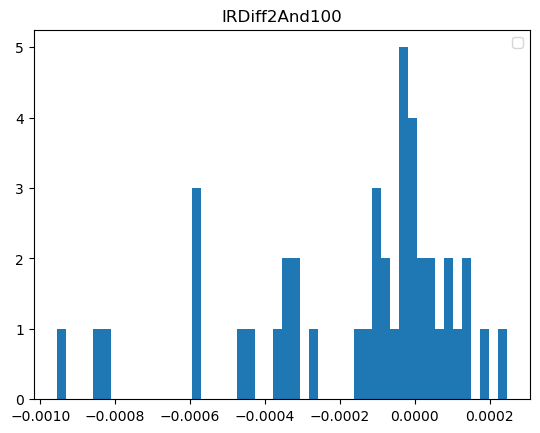

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


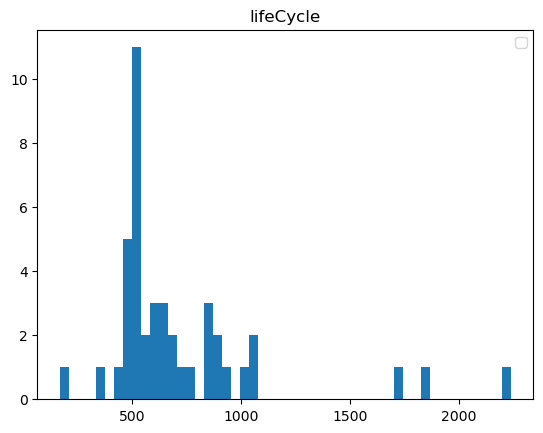

In [ ]:
for cols in df_val.columns:
    plt.hist(df_val[cols],bins=50)
    plt.legend()
    plt.title(f"{cols}")
    plt.show()


In [ ]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))
  return data, X, y

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,DeltaQ_var,DeltaQ_min,CapFadeCycle2Slope,CapFadeCycle2Intercept,Qd2,AvgChargeTime,MinIR,IRDiff2And100,lifeCycle
0,-3.586861,-1.301275,0.000012,1.082518,1.078024,10.130454,0.016998,-0.000093,493
1,-4.178031,-1.605368,-0.000005,1.074805,1.072477,10.045031,0.015085,-0.000067,1048
2,-3.703892,-1.363751,-0.000159,1.070112,1.067856,10.067868,0.013940,0.000234,772
3,-4.305225,-1.667362,-0.000021,1.064325,1.061535,10.044185,0.015220,-0.000107,1158
4,-3.837847,-1.433345,-0.000005,1.083049,1.079454,11.179535,0.016309,0.000018,917


In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "lifeCycle")
_, X_val_all, y_val_all = get_xy(val, "lifeCycle", )
_, X_test_all, y_test_all = get_xy(test, "lifeCycle")

c:\Users\moham\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
all_reg = LinearRegression()
all_reg.fit(   X_train_all, y_train_all)

LinearRegression()

In [ ]:
all_reg.score(X_val_all, y_val_all)


0.9077782575428467

In [ ]:
y_pred_lr = all_reg.predict(X_val_all)

In [ ]:
y_pred_lr_tr = all_reg.predict(X_train_all)
mean_squared_error(y_train_all,y_pred_lr_tr)

12416.63662141685

In [ ]:
mse_lr = mean_squared_error(y_val_all,y_pred_lr)
mse_lr

9735.54037147575

In [ ]:
rmse_lr = sqrt(mse_lr)
rmse_lr

98.66884194858957

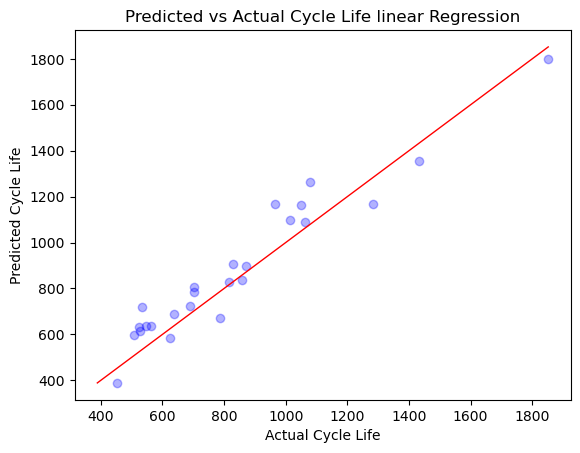

In [ ]:
plt.scatter(y_val_all, y_pred_lr, label="Predicted vs Actual", color='blue', alpha=0.3)

# Plot the diagonal line (y=x) to show perfect prediction
min_val = min(min(y_val_all), min(y_pred_lr))
max_val = max(max(y_val_all), max(y_pred_lr))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=1)

# Set labels and title
plt.xlabel("Actual Cycle Life")
plt.ylabel("Predicted Cycle Life")
plt.title("Predicted vs Actual Cycle Life linear Regression")

# Display the plot
plt.show()


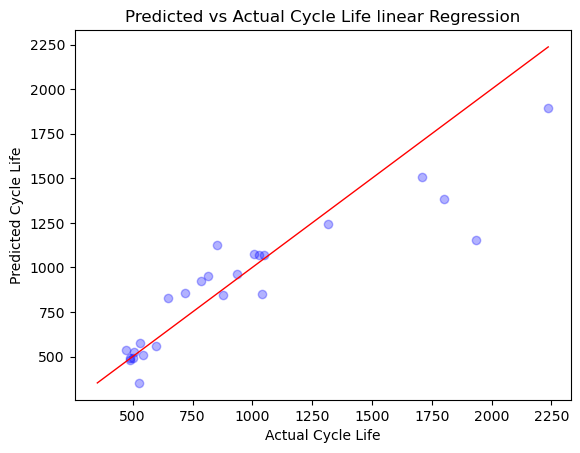

47719.33617587827
218.4475593268972


In [ ]:

y_pred_Test = all_reg.predict(X_test_all)

plt.scatter(y_test_all, y_pred_Test, label="Predicted vs Actual", color='blue', alpha=0.3)

# Plot the diagonal line (y=x) to show perfect prediction
min_val = min(min(y_test_all), min(y_pred_Test))
max_val = max(max(y_test_all), max(y_pred_Test))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=1)

# Set labels and title
plt.xlabel("Actual Cycle Life")
plt.ylabel("Predicted Cycle Life")
plt.title("Predicted vs Actual Cycle Life linear Regression")

# Display the plot
plt.show()


mse_lr_Test = mean_squared_error(y_test_all, y_pred_Test)
rmse_lr_Test =sqrt(mse_lr_Test)
print(mse_lr_Test)
print( rmse_lr_Test)

In [ ]:
all_reg.coef_

array([[-1.14288732e+03,  9.33585524e+02, -4.20373775e+05,
        -2.81107188e+04,  3.32059421e+04,  1.02595760e+02,
        -2.30750205e+04, -6.51159478e+04]])

In [ ]:
all_reg.intercept_

array([-8293.6267025])

KN REGRESSOR


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
neig_model = KNeighborsRegressor()
neig_model.fit(X_train_all,y_train_all)

KNeighborsRegressor()

In [ ]:
neig_model.score(X_val_all,y_val_all)

0.7051447429851938

In [ ]:
y_pred_knr = neig_model.predict(X_val_all)
y_pred_knr

In [ ]:
mse_knr = mean_squared_error(y_val_all,y_pred_knr)
print(mse_knr)
rmse_knr = sqrt(mse_knr)
print(rmse_knr)

31126.881599999997
176.42812020763583


In [ ]:
neig_model.get_params

<bound method BaseEstimator.get_params of KNeighborsRegressor()>

Nural Network Linear Regression 

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(8,), axis=-1)
all_normalizer.adapt(X_train_all)

In [ ]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=1000
)

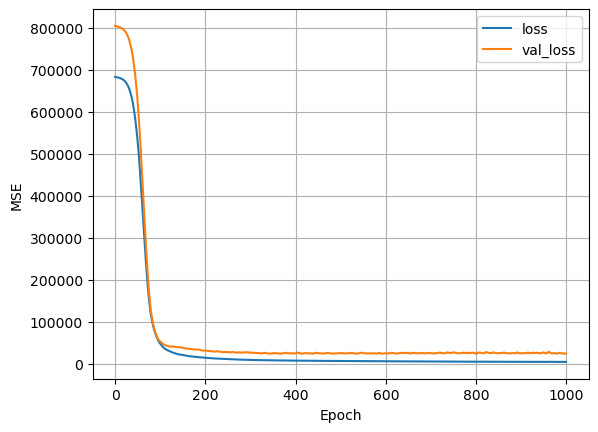

In [ ]:
plot_loss(history)

In [ ]:
y_pred_nn = nn_model.predict(X_test_all)
y_pred_nn_tr= nn_model.predict(X_train_all)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


In [ ]:
mse_nn_val = mean_squared_error(y_val_all,y_pred_nn)
rmse_nn_val = sqrt(mse_nn_val)
mse_nn_trn= mean_squared_error(y_train_all,y_pred_nn_tr)
rmse_nn_trn = sqrt(mse_nn_trn)
print(f"Valedation Error \n {mse_nn_val} \n {rmse_nn_val}")
print(f"Train Error\n {mse_nn_trn} \n {rmse_nn_trn}")

Valedation Error 
 344764.82940255164 
 587.1667815898236
Train Error
 3818.9664877808173 
 61.79778707834786


SVR 

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
svr_regr = make_pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the features
    ('svr', SVR(
        kernel='rbf',        # Specifies the kernel type to be used in the algorithm.
        degree=3,            # Degree of the polynomial kernel function ('poly'). Ignored by all other kernels.
        gamma='scale',       # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'.
        coef0=0.0,           # Independent term in kernel function for 'poly' and 'sigmoid'.
        tol=1e-3,            # Tolerance for stopping criterion.
        C=1.0,               # Regularization parameter.
        epsilon=0.1,         # Epsilon-tube within which no penalty is associated in the training loss function.
        shrinking=True,      # Whether to use the shrinking heuristic.
        cache_size=200,      # Size of the kernel cache (in MB).
        verbose=False,       # Enable verbose output.
        max_iter=-1          # Hard limit on iterations within solver.
    ))
])


svr_regr.fit(X_train_all, y_train_all)

NameError: name 'X_train_all' is not defined

In [ ]:
y_pred_svr= svr_regr.predict(X_val_all)
mse_svr = mean_squared_error(y_val_all,y_pred_svr)
print(mse_svr)
rmse_svr = sqrt(mse_svr)
print(rmse_svr)


115786.82644393142
340.27463385320306


116464.2752251315
341.26862619515947
